In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Import necessary libraries

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\weatherAUS.csv.txt")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Open and read the data

## Data Explanation
- The dataset contains 10 years of data of weather prediction in Australia
- Two predictions have to be made:
    - Whether it will rain or not
    - How much will it rain
- There is vast data and features for prediction

## Exploratory Data Analysis
### Identifying variables and data types

In [3]:
data.shape

(8425, 23)

The dataframe looks good with good amount of data.
There are 8425 rows for the analysis

## Checking data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

- There are 7 columns with object type data
    - Date
    - Location
    - WindGustDir
    - WindDir9am
    - WindDir3pm
    - RainToday
    - Raintomorrow
- Other features are having float type data
- Date column is not needed for prediction. So, delete it

In [5]:
data = data.drop(['Date'],axis=1)

Thus 'Date' column is dropped, since it is not useful for prediction

In [6]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

There are totally 22 features for prediction

## Checking NaN values

In [7]:
data.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

- Since there are more NaN values, it has to be treated in its own way.
- There are also object type data having NaN values. So, it has to be encoded first and then treated for missing values

### Check the unique values of object type data

In [8]:
print(data['Location'].nunique())
print(data['MinTemp'].nunique())
print(data['MaxTemp'].nunique())
print(data['Rainfall'].nunique())
print(data['Evaporation'].nunique())
print(data['Sunshine'].nunique())
print(data['WindGustDir'].nunique())
print(data['WindGustSpeed'].nunique())
print(data['WindDir9am'].nunique())
print(data['WindDir3pm'].nunique())
print(data['WindSpeed9am'].nunique())
print(data['WindSpeed3pm'].nunique())
print(data['Humidity9am'].nunique())
print(data['Humidity3pm'].nunique())
print(data['Pressure9am'].nunique())
print(data['Pressure3pm'].nunique())
print(data['Cloud9am'].nunique())
print(data['Cloud3pm'].nunique())
print(data['Temp9am'].nunique())
print(data['Temp3pm'].nunique())
print(data['RainToday'].nunique())
print(data['RainTomorrow'].nunique())

12
285
331
250
116
140
16
52
16
16
34
35
90
94
384
374
9
9
304
328
2
2


- The following has to be treated like below:
    - MinTemp            75 - Mean
    - MaxTemp            60 - Mean
    - Rainfall          240 - Mean
    - Evaporation      3512 - Mean
    - Sunshine         3994 - Mean
    - WindGustDir       991 - Object - Mode 
    - WindGustSpeed     991 - Mean
    - WindDir9am        829 - Object - Mode
    - WindDir3pm        308 - Object - Mode
    - WindSpeed9am       76 - Mean
    - WindSpeed3pm      107 - Mean
    - Humidity9am        59 - Mean
    - Humidity3pm       102 - Mean
    - Pressure9am      1309 - Mean
    - Pressure3pm      1312 - Mean
    - Cloud9am         2421 - Mean
    - Cloud3pm         2455 - Mean
    - Temp9am            56 - Mean
    - Temp3pm            96 - Mean
    - RainToday         240 - Object - Mode
    - RainTomorrow      239 - Object - Mode

## Encoding

In [9]:
print(data['WindGustDir'].unique())
print(data['WindDir9am'].unique())
print(data['WindDir3pm'].unique())
print(data['RainToday'].unique())
print(data['RainTomorrow'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
['No' 'Yes' nan]
['No' 'Yes' nan]


Knowing the type of data in object type to encode

In [10]:
#WindDustGir
data.WindGustDir[data.WindGustDir == 'W'] = 1
data.WindGustDir[data.WindGustDir == 'WNW'] = 2
data.WindGustDir[data.WindGustDir == 'WSW'] = 3
data.WindGustDir[data.WindGustDir == 'NE'] = 4
data.WindGustDir[data.WindGustDir == 'NNW'] = 5
data.WindGustDir[data.WindGustDir == 'N'] = 6
data.WindGustDir[data.WindGustDir == 'NNE'] = 7
data.WindGustDir[data.WindGustDir == 'SW'] = 8
data.WindGustDir[data.WindGustDir == 'ENE'] = 9
data.WindGustDir[data.WindGustDir == 'SSE'] = 10
data.WindGustDir[data.WindGustDir == 'S'] = 11
data.WindGustDir[data.WindGustDir == 'NW'] = 12
data.WindGustDir[data.WindGustDir == 'SE'] = 13
data.WindGustDir[data.WindGustDir == 'ESE'] = 14
data.WindGustDir[data.WindGustDir == 'E'] = 15
data.WindGustDir[data.WindGustDir == 'SSW'] = 16
#WindDir9am
data.WindDir9am[data.WindDir9am == 'W'] = 1
data.WindDir9am[data.WindDir9am == 'NNW'] = 2
data.WindDir9am[data.WindDir9am == 'SE'] = 3
data.WindDir9am[data.WindDir9am == 'ENE'] = 4
data.WindDir9am[data.WindDir9am == 'SW'] = 5
data.WindDir9am[data.WindDir9am == 'SSE'] = 6
data.WindDir9am[data.WindDir9am == 'S'] = 7
data.WindDir9am[data.WindDir9am == 'NE'] = 8
data.WindDir9am[data.WindDir9am == 'SSW'] = 9
data.WindDir9am[data.WindDir9am == 'N'] = 10
data.WindDir9am[data.WindDir9am == 'WSW'] = 11
data.WindDir9am[data.WindDir9am == 'ESE'] = 12
data.WindDir9am[data.WindDir9am == 'E'] = 13
data.WindDir9am[data.WindDir9am == 'NW'] = 14
data.WindDir9am[data.WindDir9am == 'WNW'] = 15
data.WindDir9am[data.WindDir9am == 'NNE'] = 16
#WindDir3pm
data.WindDir3pm[data.WindDir3pm == 'WNW'] = 1
data.WindDir3pm[data.WindDir3pm == 'WSW'] = 2
data.WindDir3pm[data.WindDir3pm == 'E'] = 3
data.WindDir3pm[data.WindDir3pm == 'NW'] = 4
data.WindDir3pm[data.WindDir3pm == 'W'] = 5
data.WindDir3pm[data.WindDir3pm == 'SSE'] = 6
data.WindDir3pm[data.WindDir3pm == 'ESE'] = 7
data.WindDir3pm[data.WindDir3pm == 'ENE'] = 8
data.WindDir3pm[data.WindDir3pm == 'NNW'] = 9
data.WindDir3pm[data.WindDir3pm == 'SSW'] = 10
data.WindDir3pm[data.WindDir3pm == 'SW'] = 11
data.WindDir3pm[data.WindDir3pm == 'SE'] = 12
data.WindDir3pm[data.WindDir3pm == 'N'] = 13
data.WindDir3pm[data.WindDir3pm == 'S'] = 14
data.WindDir3pm[data.WindDir3pm == 'NNE'] = 15
data.WindDir3pm[data.WindDir3pm == 'NE'] = 16
#RainToday
data.RainToday[data.RainToday == 'Yes'] = 1
data.RainToday[data.RainToday == 'No'] = 2                
#RainTomorrow
data.RainTomorrow[data.RainTomorrow == 'Yes'] = 1
data.RainTomorrow[data.RainTomorrow == 'No'] = 2

- The object type columns having NaN values are decoded manually.
- These cannot be decoded using any encoding type, because it has NaN values which will also be encoded

In [11]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

Use label encoder to encode the Non-null column which has no NaN values(i.e.,) Location

In [12]:
loc = lab_enc.fit_transform(data['Location'])
data['Location'] = loc

Thus the data is encoded using label encoder
## Missing value treatment

In [13]:
data['MinTemp'].fillna(data['MinTemp'].mean(), inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(), inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(), inplace=True)
data['Evaporation'].fillna(data['Evaporation'].mean(), inplace=True)
data['Sunshine'].fillna(data['Sunshine'].mean(), inplace=True)
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0], inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(), inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0], inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0], inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(), inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(), inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(), inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(), inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(), inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(), inplace=True)
data['Cloud9am'].fillna(data['Cloud9am'].mode()[0], inplace=True)
data['Cloud3pm'].fillna(data['Cloud3pm'].mode()[0], inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(), inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(), inplace=True)
data['RainToday'].fillna(data['RainToday'].mode()[0], inplace=True)
data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0], inplace=True)

- Thus the values are treated using mean and mode
- The following are treated with mode values:
    - WindGustDir
    - WindDir9am
    - WindDir3pm
    - RainToday
    - RainTomorrow
- The other columns are treated with mean values

## Visualisation of categorical variable

In [14]:
class_data = data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Cloud9am','Cloud3pm']]

<function matplotlib.pyplot.show(close=None, block=None)>

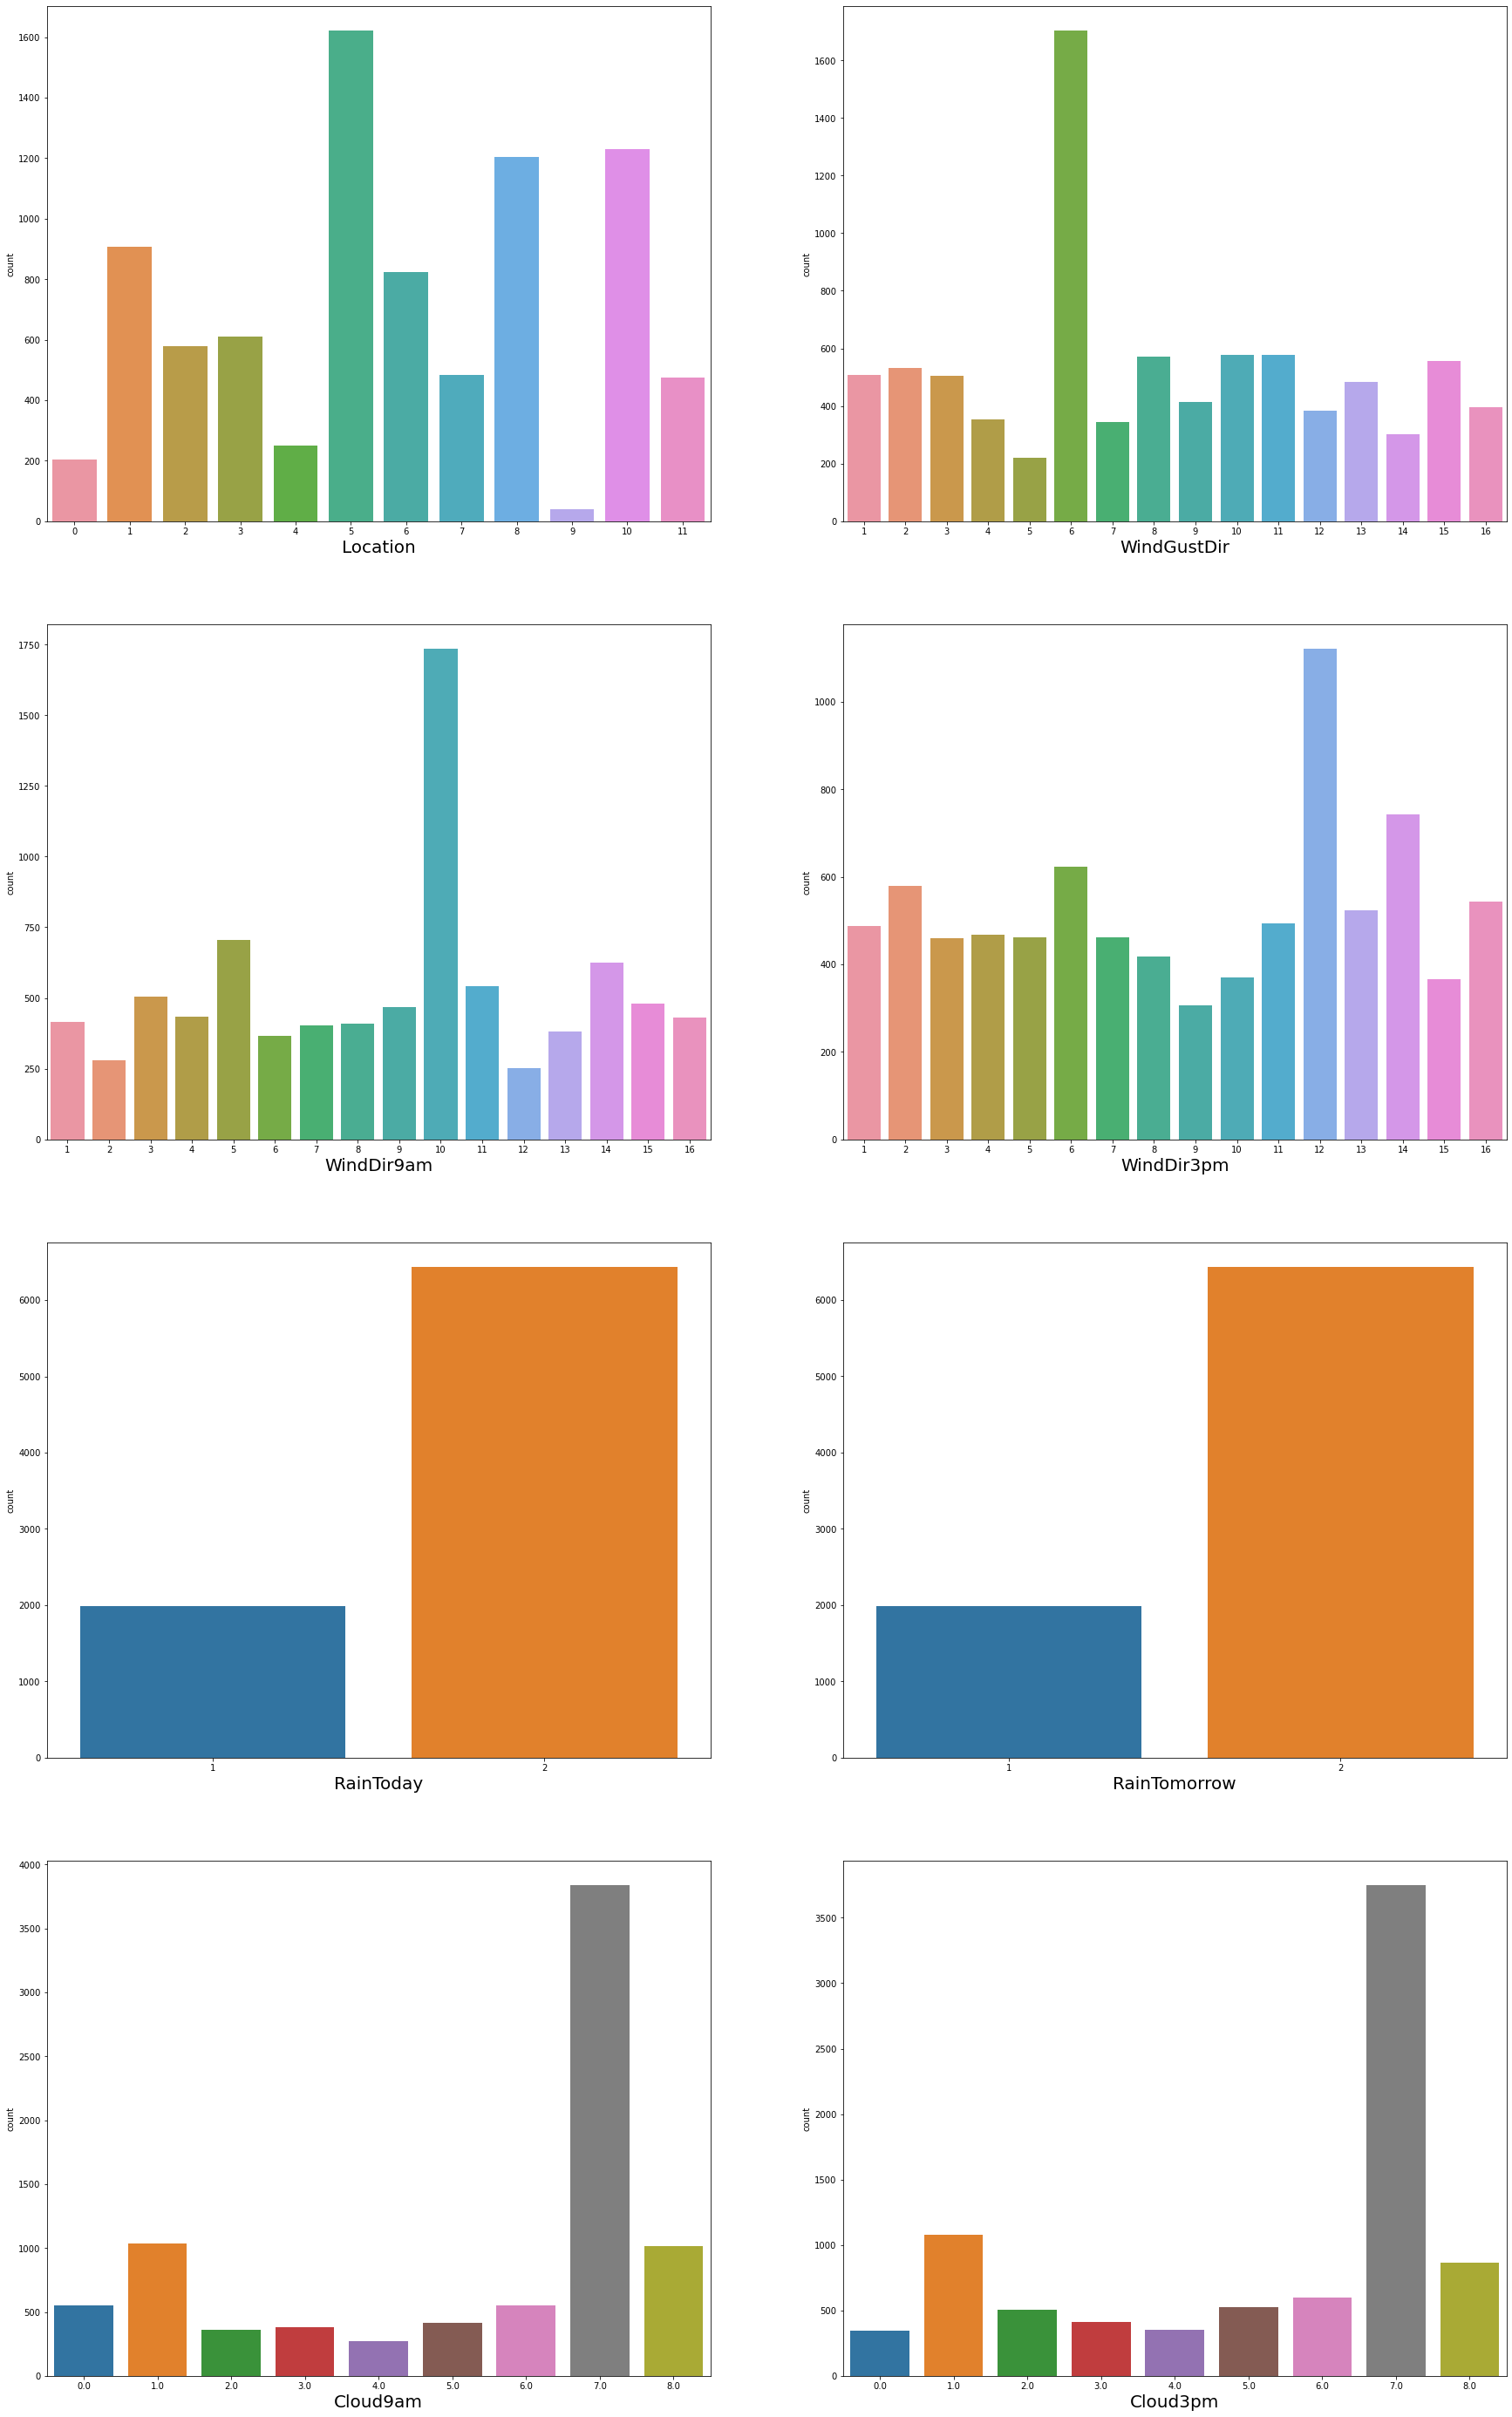

In [15]:
plt.figure(figsize = (30,50), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <=8:
        ax =  plt.subplot(4,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- In Location, Darwin has the highest record of values
- In Windgustdir, North direction values are recorded more compared to others
- In Winddir9am also North direction is recorded more
- In Winddir3pm, SouthEast direction is recorded more
- In RainToday, not raining is more
- Also in RainTomorrow, it will not rain record is more compared to other records
- In Cloud9am, 4.5 is the highest number of values recorded
- In Cloud3pm, 4.5 is the highest number of values recorded

## Visualisation of Continuous variable

In [16]:
continuous_data = data.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Cloud9am','Cloud3pm'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

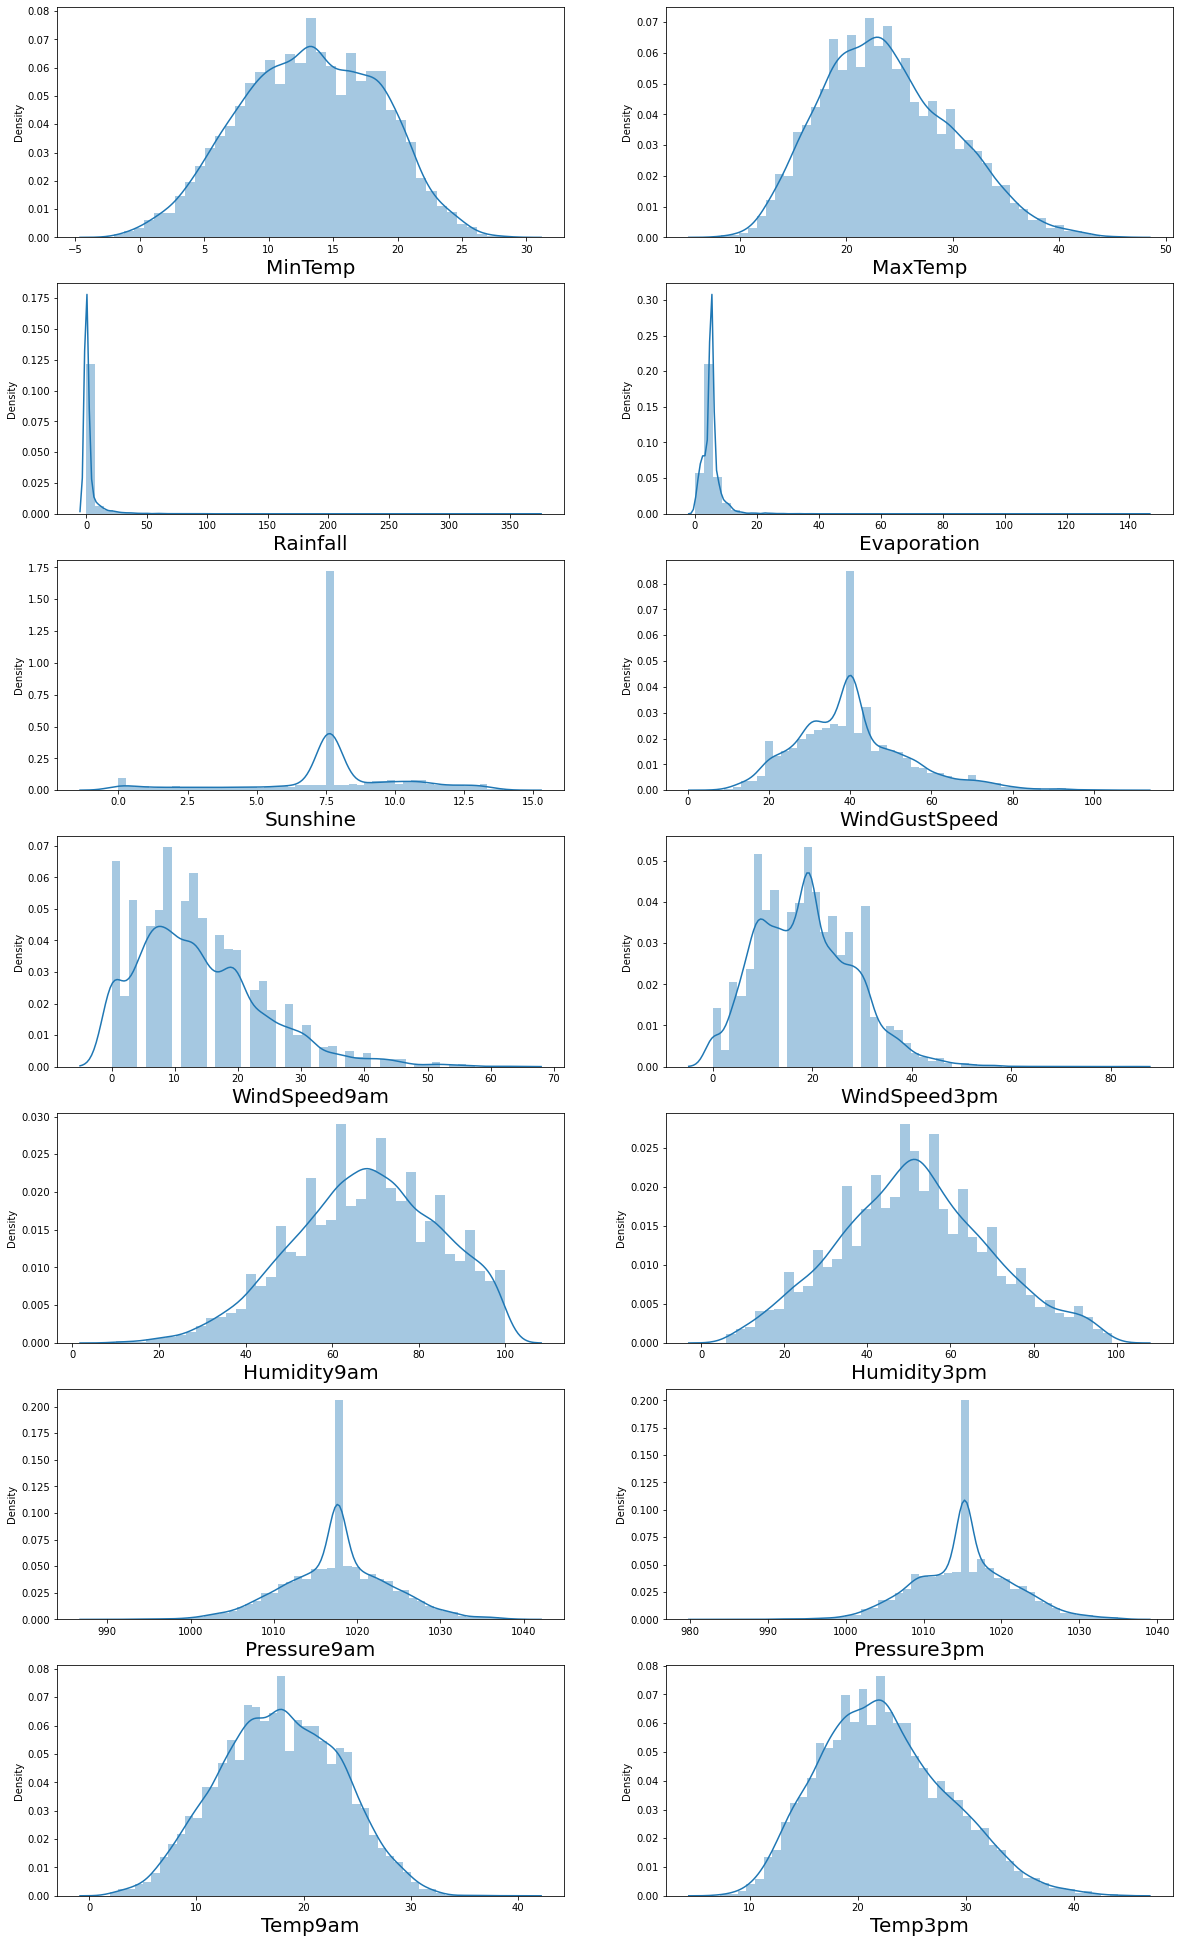

In [17]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in continuous_data:
    if plotnumber <=20:
        ax =  plt.subplot(10,2,plotnumber)
        sns.distplot(continuous_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- MinTemp has a standardised curve and no skewness is measured
- MaxTemp has a standardised curve and no skewness is measured
- Rainfall looks normally distributed but is skewed
- Evaporation looks normally distributed but is skewed
- Sunshine has a normally distributed data with one data in high amount
- Windgustspeed looks normally distributed but also skewed
- Windspeed9am is also skewed
- Windspeed3pm is skewed and shows having outliers
- Humidity9am looks standardised but with skewness
- Humidity3pm looks normally distributed with standaridised curve
- Pressure9am is normally distributed with skewness
- Pressure3pm is normally distributed with skewness
- Temp9am is normally distributed with standardised curve
- Temp3pm is normally distributed with standardised curve

## Describing the data

In [18]:
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.193305,23.859976,2.805913,5.389395,7.632205,8.125579,40.174469,8.824807,8.811395,...,67.822496,51.249790,1017.640233,1015.236075,5.265875,5.230742,17.762015,22.442934,1.763798,1.763680
std,3.162654,5.379488,6.114516,10.309308,3.852004,2.825451,4.369849,13.776101,4.244535,4.647821,...,16.774231,18.311894,6.275759,6.217451,2.667166,2.564122,5.608301,5.945849,0.424773,0.424846
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000
25%,3.000000,9.300000,19.300000,0.000000,4.000000,7.632205,5.000000,31.000000,5.000000,5.000000,...,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,2.000000,2.000000
50%,6.000000,13.200000,23.300000,0.000000,5.389395,7.632205,8.000000,40.174469,10.000000,9.000000,...,68.000000,51.000000,1017.640233,1015.236075,7.000000,7.000000,17.762015,22.000000,2.000000,2.000000
75%,8.000000,17.300000,28.000000,1.400000,5.389395,8.900000,12.000000,48.000000,12.000000,13.000000,...,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,2.000000,2.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,16.000000,107.000000,16.000000,16.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2.000000,2.000000


The data looks good and this has to be standardised since there are different range of values
## Correlation

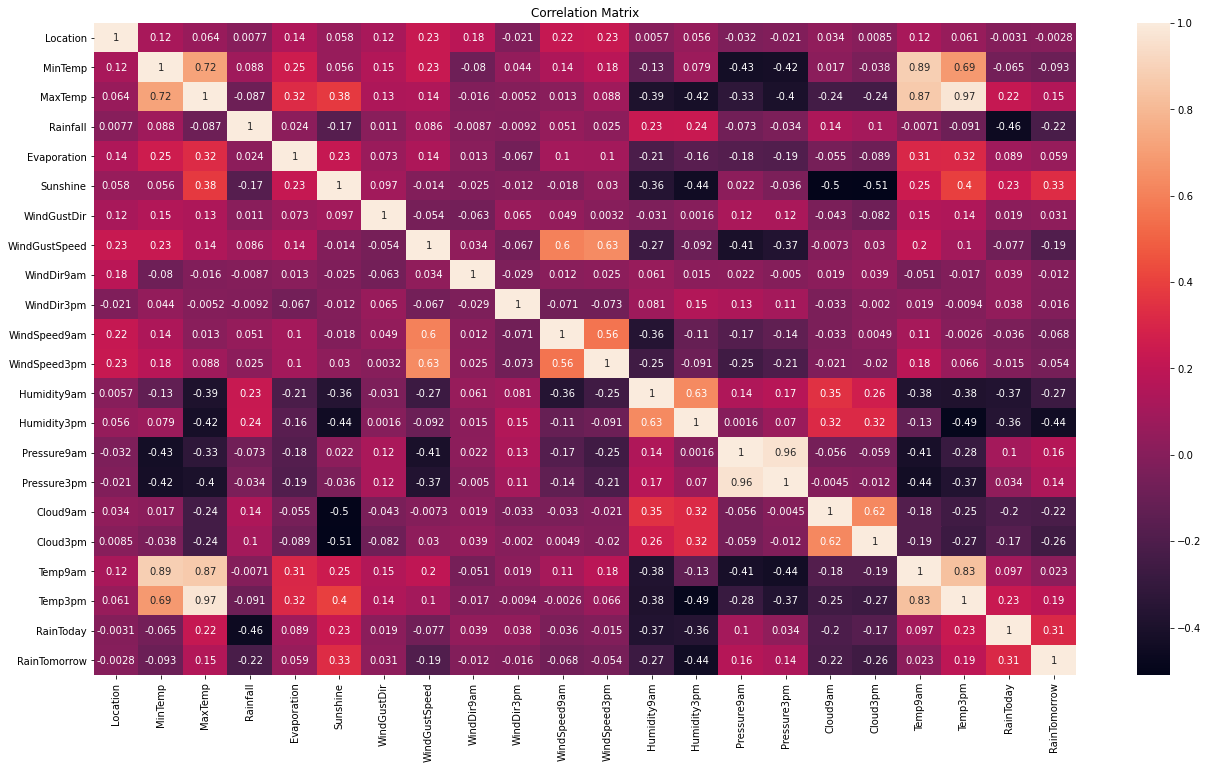

In [19]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

- Pressure3pm and Pressure9am looks correlated heavily with 96%
- Temp3pm and MaxTemp alos looks highly correlated with 97%
- Other columns also are correlated with each other, but high correlation is only chosen to avoid feature reduction
## Confirming the correlation existence

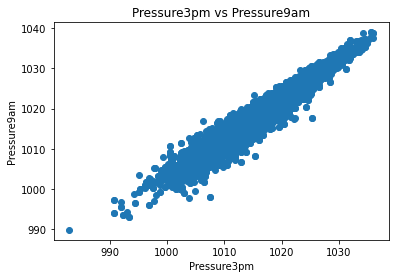

In [20]:
plt.scatter(data.Pressure3pm, data.Pressure9am)
plt.xlabel('Pressure3pm')
plt.ylabel('Pressure9am')
plt.title ('Pressure3pm vs Pressure9am')
plt.show()

Pressure3pm and Pressure9am are highly correlated. Remove any one feature

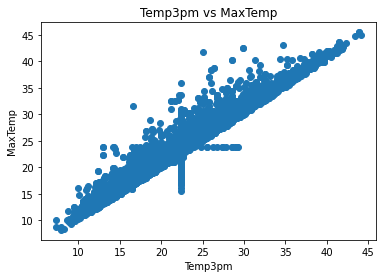

In [21]:
plt.scatter(data.Temp3pm, data.MaxTemp)
plt.xlabel('Temp3pm')
plt.ylabel('MaxTemp')
plt.title ('Temp3pm vs MaxTemp')
plt.show()

MaxTemp and Temp3pm are highly correlated. Remove any one feature

In [22]:
data = data.drop(['Pressure9am','Temp3pm'],axis=1)

Removed Pressure9am and Temp3pm as theie correlation is confirmed
## Collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

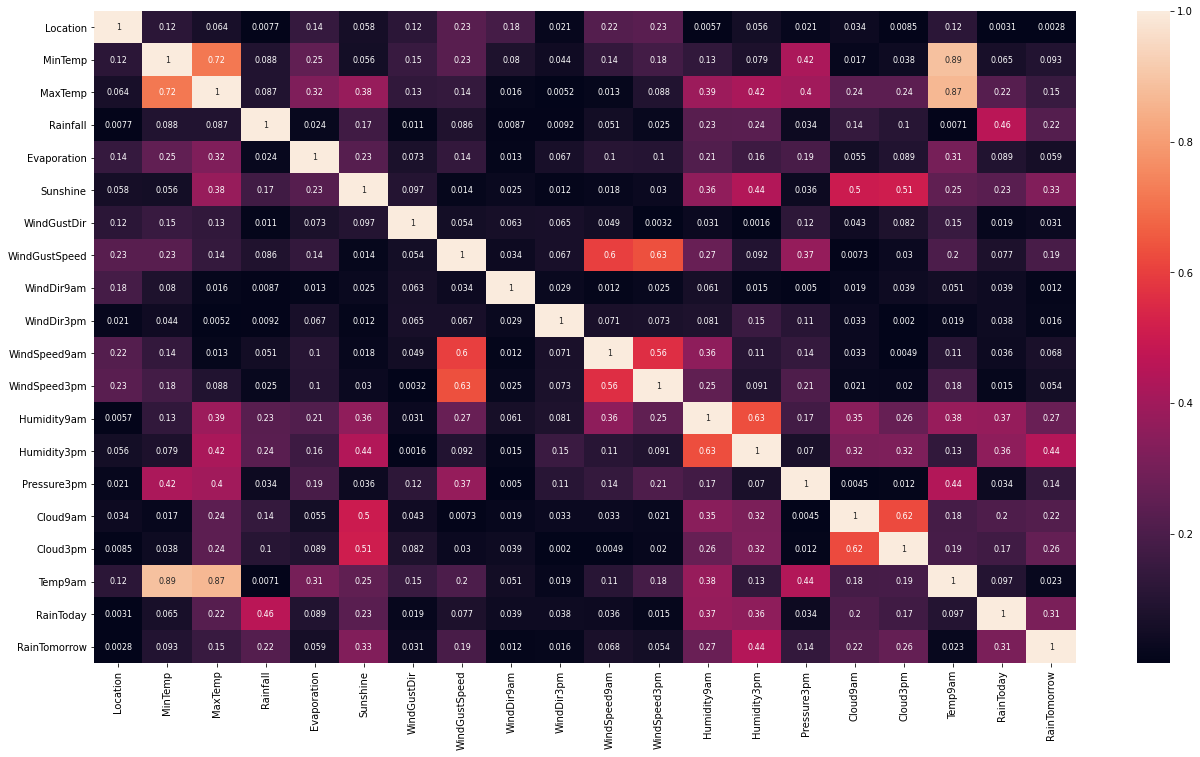

In [23]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,12))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

There is collinearity but no high degree of collinearity between features is visualised

## Treat Outliers

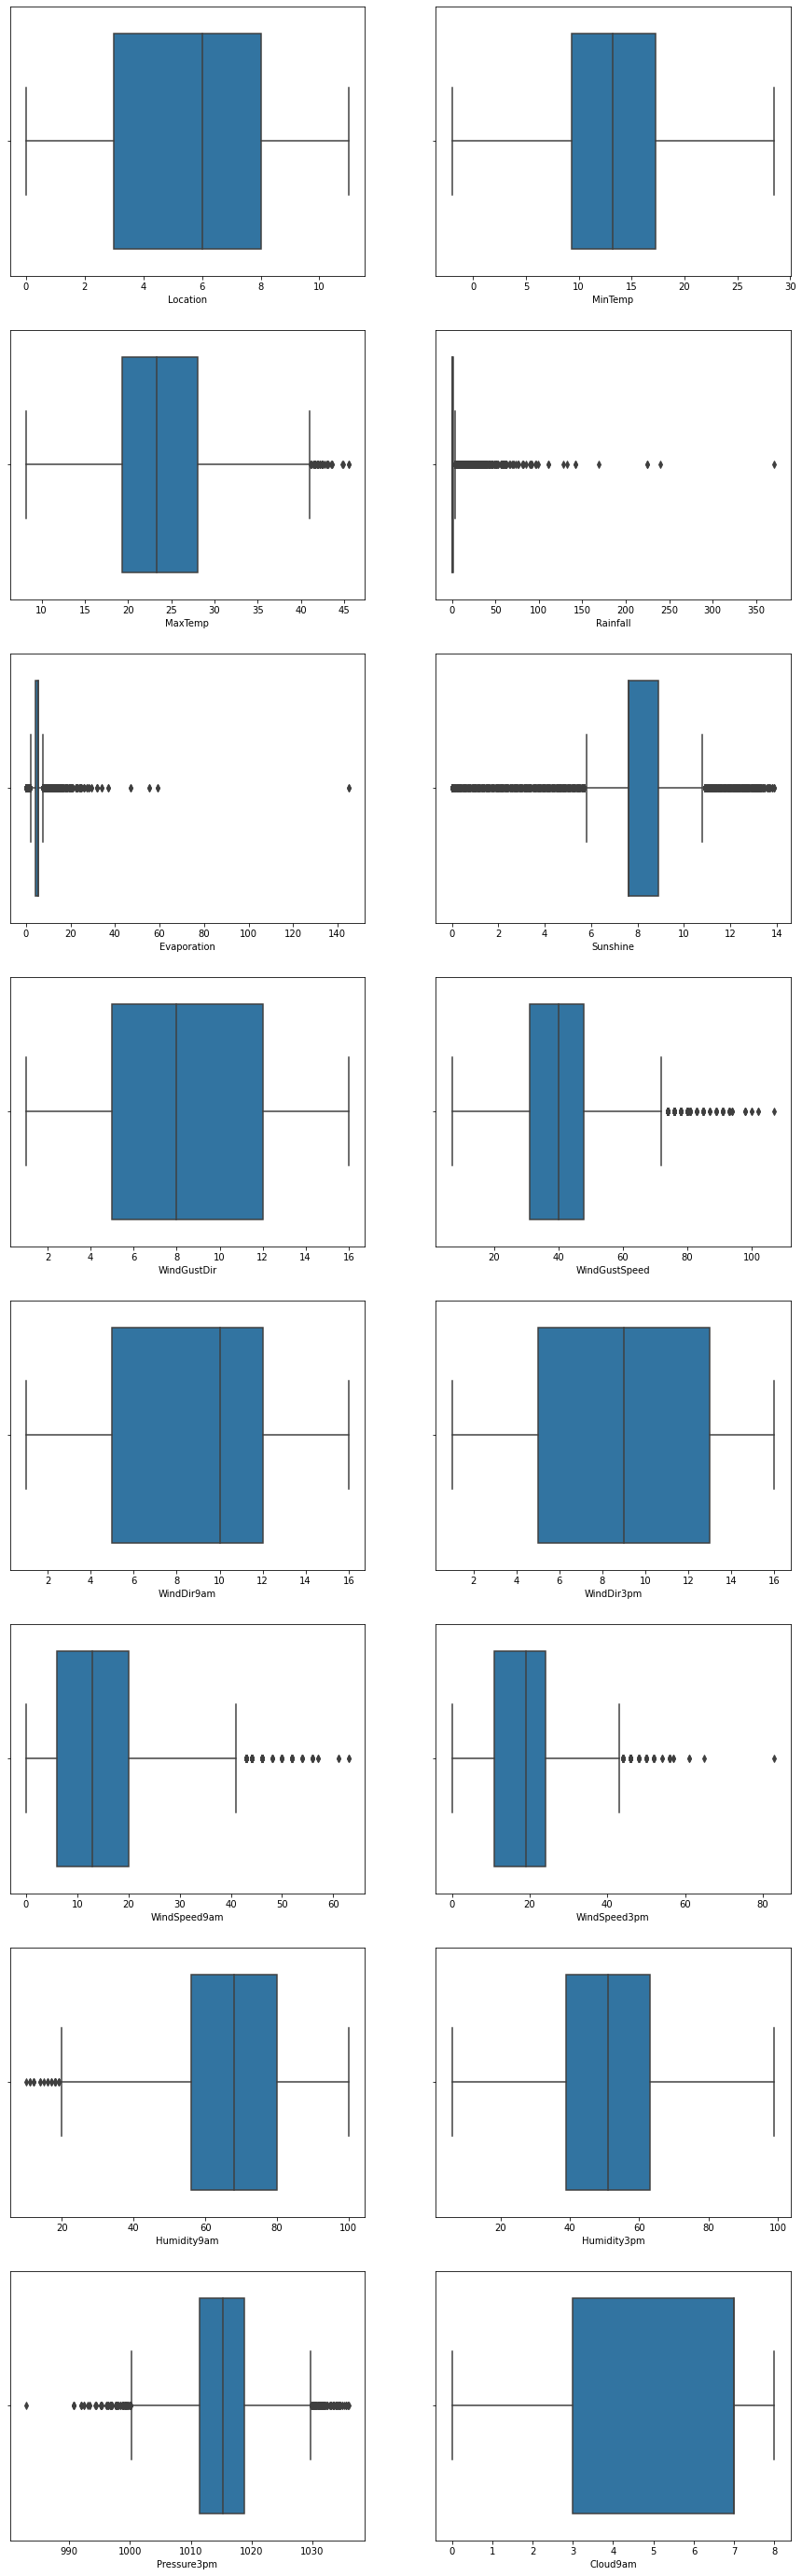

In [24]:
plt.figure(figsize=(15,50))
graph = 1
for column in data:
    if graph<=16:
        ax = plt.subplot(8,2,graph)
        sns.boxplot(data[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

There is outliers in th following feaues:
- MaxTemp
- Evaporation
- Sunshine
- WindGustSpeed
- WindSpeed9am
- WindSpeed3pm
- Humidity3pm
- Humidity9am
- Pressure3pm
## Quantify

In [25]:
from scipy.stats import zscore
(np.abs(zscore(data))<3).all()

False

In [26]:
data['MaxTemp_zscore'] = zscore(data['MaxTemp'])
data['is_outlier'] = data['MaxTemp_zscore'].apply(lambda x: x<=-3 or x>=3)
data['Evaporation_zscore'] = zscore(data['Evaporation'])
data['is_outlier'] = data['Evaporation_zscore'].apply(lambda x: x<=-3 or x>=3)
data['Sunshine_zscore'] = zscore(data['Sunshine'])
data['is_outlier'] = data['Sunshine_zscore'].apply(lambda x: x<=-3 or x>=3)
data['WindGustSpeed_zscore'] = zscore(data['WindGustSpeed'])
data['is_outlier'] = data['WindGustSpeed_zscore'].apply(lambda x: x<=-3 or x>=3)
data['WindSpeed9am_zscore'] = zscore(data['WindSpeed9am'])
data['is_outlier'] = data['WindSpeed9am_zscore'].apply(lambda x: x<=-3 or x>=3)
data['WindSpeed3pm_zscore'] = zscore(data['WindSpeed3pm'])
data['is_outlier'] = data['WindSpeed3pm_zscore'].apply(lambda x: x<=-3 or x>=3)
data['Humidity3pm_zscore'] = zscore(data['Humidity3pm'])
data['is_outlier'] = data['Humidity3pm_zscore'].apply(lambda x: x<=-3 or x>=3)
data['Humidity9am_zscore'] = zscore(data['Humidity9am'])
data['is_outlier'] = data['Humidity9am_zscore'].apply(lambda x: x<=-3 or x>=3)
data['Pressure3pm_zscore'] = zscore(data['Pressure3pm'])
data['is_outlier'] = data['Pressure3pm_zscore'].apply(lambda x: x<=-3 or x>=3)
data[data['is_outlier']]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,MaxTemp_zscore,is_outlier,Evaporation_zscore,Sunshine_zscore,WindGustSpeed_zscore,WindSpeed9am_zscore,WindSpeed3pm_zscore,Humidity3pm_zscore,Humidity9am_zscore,Pressure3pm_zscore
12,1,15.9,18.6,15.600000,5.389395,7.632205,1,61.000000,2,9,...,-0.860295,True,2.305893e-16,1.257472e-15,1.511804,1.397352,0.975490,2.280086,0.487533,-3.576609
568,1,3.0,14.8,0.000000,5.389395,7.632205,13,15.000000,10,12,...,-1.481804,True,2.305893e-16,1.257472e-15,-1.827510,-1.367267,-1.188525,0.532484,1.560671,3.211141
602,1,1.9,14.9,0.200000,5.389395,7.632205,3,19.000000,10,5,...,-1.465449,True,2.305893e-16,1.257472e-15,-1.537135,-1.367267,-0.982428,0.040971,1.858765,3.034209
683,1,13.8,18.6,22.200000,5.389395,7.632205,2,63.000000,2,16,...,-0.860295,True,2.305893e-16,1.257472e-15,1.656992,1.397352,-1.497670,2.116248,1.501052,-5.201166
748,1,10.4,18.0,3.000000,5.389395,7.632205,1,61.000000,4,9,...,-0.958428,True,2.305893e-16,1.257472e-15,1.511804,-0.478639,-0.570235,0.204809,0.189439,-3.367508
3051,10,14.3,16.1,91.400000,5.389395,7.632205,12,61.000000,15,1,...,-1.269183,True,2.305893e-16,1.257472e-15,1.511804,0.311252,0.048055,2.498536,1.739528,-3.029729
3058,10,9.3,17.1,0.000000,5.389395,7.632205,16,37.000000,1,10,...,-1.105628,True,2.305893e-16,1.257472e-15,-0.230447,-0.083694,0.769394,0.204809,-0.645224,3.098548
3059,10,9.0,19.0,1.400000,5.389395,7.632205,2,20.000000,15,3,...,-0.794873,True,2.305893e-16,1.257472e-15,-1.464541,-0.083694,-1.188525,0.969384,1.024102,3.323734
3167,10,11.6,21.5,0.000000,3.800000,7.632205,6,40.174469,16,9,...,-0.385986,True,-4.126397e-01,1.257472e-15,0.000000,0.113779,-0.982428,1.351672,0.249058,-3.077983
3212,10,17.9,33.2,2.805913,5.389395,7.632205,2,72.000000,15,1,...,1.527607,True,2.305893e-16,1.257472e-15,2.310336,0.311252,3.242554,-1.979694,-0.466368,-3.222746


There are 50 rows which has outliers. Out of 8425 rows, 50 rows can be deleted to normalise the data

In [27]:
data = data.drop([12,568,602,683,748,3051,3058,3059,3167,3212,3303,3449,3903,3910,3911,4019,4064,4155,4301,4528,4678,4779,4780,4814,4854,4895,4960,5122,5175,5176,5214,5339,5489,5590,5591,5625,5665,5706,5771,5933,5986,5987,6025,6758,6786,6793,6794,7187,7633,7735],axis=0)

Removed outliers. Check for data loss

In [28]:
data.shape

(8375, 30)

In [29]:
Data_loss = ((8425-8375)/8425)*100
Data_loss

0.5934718100890208

Data loss is 0.59%, which is accpetable. Because, working with outliers will not give good accuracy

# Model Building for predicting whether it will rain or not

In [30]:
df = pd.DataFrame()
df = data.copy()

Copy the dataframe to another variable to find the solution for rainfall capacity

## Treat Skewness

In [31]:
x = data.drop('RainTomorrow',axis=1)
y = data['RainTomorrow']

In [32]:
x.skew()
x.skew().sort_values()

RainToday               -1.249542
Cloud9am                -0.861759
Cloud3pm                -0.802552
Sunshine_zscore         -0.715537
Sunshine                -0.715537
Humidity9am_zscore      -0.255300
Humidity9am             -0.255300
WindDir3pm              -0.151669
WindDir9am              -0.125947
MinTemp                 -0.094688
Location                -0.050147
Temp9am                 -0.016298
is_outlier               0.000000
Pressure3pm_zscore       0.041354
Pressure3pm              0.041354
Humidity3pm_zscore       0.116094
Humidity3pm              0.116094
WindGustDir              0.155904
MaxTemp                  0.377566
MaxTemp_zscore           0.377566
WindSpeed3pm             0.481012
WindSpeed3pm_zscore      0.481012
WindGustSpeed_zscore     0.747986
WindGustSpeed            0.747986
WindSpeed9am             0.964008
WindSpeed9am_zscore      0.964008
Rainfall                13.575416
Evaporation             14.026195
Evaporation_zscore      14.026195
dtype: float64

There is more skewness in rainfall and evaporation

In [33]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x = pd.DataFrame (x_new,columns = x.columns)

Treated the skewed data using power transform

In [34]:
x.skew().sort_values(ascending=False)

Rainfall                0.907805
Evaporation             0.079926
WindSpeed9am_zscore     0.067789
Sunshine_zscore         0.053750
WindSpeed3pm_zscore     0.040125
MaxTemp_zscore          0.013024
WindGustSpeed           0.011035
Pressure3pm_zscore      0.006214
Humidity3pm_zscore      0.003521
is_outlier              0.000000
Pressure3pm            -0.000362
WindGustSpeed_zscore   -0.003023
MaxTemp                -0.010588
Humidity9am_zscore     -0.032574
Humidity3pm            -0.038970
WindSpeed3pm           -0.039873
Temp9am                -0.048552
Humidity9am            -0.066788
Sunshine               -0.074663
WindSpeed9am           -0.079213
MinTemp                -0.103686
Evaporation_zscore     -0.118624
WindGustDir            -0.126863
WindDir9am             -0.185386
Location               -0.186529
WindDir3pm             -0.237631
Cloud3pm               -0.593535
Cloud9am               -0.660527
RainToday              -1.249542
dtype: float64

Checked whether skewness is treated or not

## Model building

In [35]:
x = data.drop('RainTomorrow', axis = 1)
y = data['RainTomorrow']

## Finding the relationship between dependent and independent variable

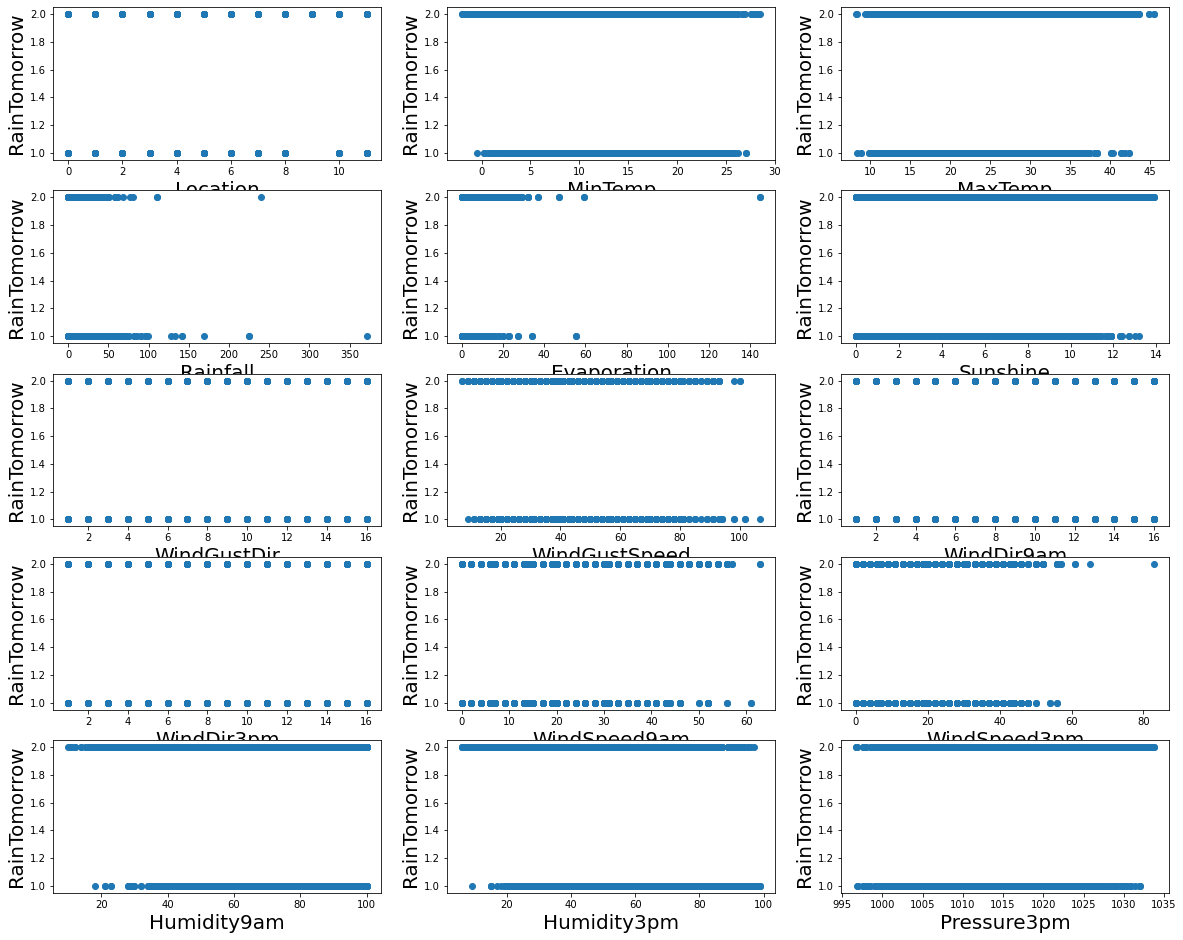

In [36]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax = plt.subplot(15,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('RainTomorrow', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship looks fairly linear

## Standardisation

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

Thus the data is standardised

## Finding best random state

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [39]:
maxacc = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('Best accuracy is:',maxacc,'on Random State',maxrs)

Best accuracy is: 0.8513432835820895 on Random State 140


## Balance the imbalanced dataset

In [40]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Since the Rain_Tomorrow values are imbalanced, treat it using SMOTE

In [41]:
print ('Before fit {}'.format (Counter(y_train)))
ove_sam = SMOTE (0.75)
x_train,y_train = ove_sam.fit_resample(x_train,y_train)
print ('After fit {}'.format (Counter(y_train)))

Before fit Counter({2: 5126, 1: 1574})
After fit Counter({2: 5126, 1: 3844})


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 140)

## Logistic Regression

In [43]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 85.13432835820896
[[ 204  191]
 [  58 1222]]
              precision    recall  f1-score   support

           1       0.78      0.52      0.62       395
           2       0.86      0.95      0.91      1280

    accuracy                           0.85      1675
   macro avg       0.82      0.74      0.76      1675
weighted avg       0.84      0.85      0.84      1675



## Decision tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 85.07462686567165
[[ 265  130]
 [ 120 1160]]
              precision    recall  f1-score   support

           1       0.69      0.67      0.68       395
           2       0.90      0.91      0.90      1280

    accuracy                           0.85      1675
   macro avg       0.79      0.79      0.79      1675
weighted avg       0.85      0.85      0.85      1675



## Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 91.58208955223881
[[ 284  111]
 [  30 1250]]
              precision    recall  f1-score   support

           1       0.90      0.72      0.80       395
           2       0.92      0.98      0.95      1280

    accuracy                           0.92      1675
   macro avg       0.91      0.85      0.87      1675
weighted avg       0.92      0.92      0.91      1675



## SVC

In [46]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 86.26865671641791
[[ 205  190]
 [  40 1240]]
              precision    recall  f1-score   support

           1       0.84      0.52      0.64       395
           2       0.87      0.97      0.92      1280

    accuracy                           0.86      1675
   macro avg       0.85      0.74      0.78      1675
weighted avg       0.86      0.86      0.85      1675



Accuracy score is 0.92 for Random Forest Classifier.
- On comparing all the accuracy scores, Random Forest Classifier has the best accuracy score. Cross check with cross validation score. 

## Cross-Validation

In [47]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=10)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=10)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rf,x,y,cv=10)
print('RFC cvs:',sc2.mean())

sc3 = cross_val_score(svc,x,y,cv=10)
print('SVC cvs:',sc3.mean())

LR cvs: 0.8241219778559066
DT cvs: 0.8476547106811176
RFC cvs: 0.8987587787957331
SVC cvs: 0.8403643538834855


- The cross validation score for Logistic regression is 0.82
    - Accuracy is 0.85
- The cross validation score for Decision tree classifier is 0.84
    - Accuracy is 0.85
- The cross validation score for Random forest classifier is 0.89
    - Accuracy is 0.92
- The cross validation score for SVC is 0.84
    - Accuracy is 0.86
   
On checking with the Accuracy and CV Score, it is clear that Decision tree classifier has approximately same scores for both. So, choose Decision Tree classifier as the best model and do hyperparameter tuning.

## Hyper parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy'],
             'random_state' : [140]
         }

GVC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GVC.fit(x_train,y_train)
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'random_state': 140}

In [49]:
GVC_pred=GVC.best_estimator_.predict(x_test)
accuracy_score(y_test,GVC_pred)

0.8734328358208955

On tuning the parameters, the score is 0.87. So, use the GVC_pred to evaluate and save the model.
## ROC AUC Score

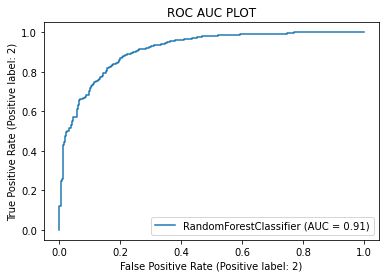

In [50]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GVC.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

## Save the model

In [51]:
import pickle
filename = 'Rain_tomorrow.pkl'
pickle.dump(rf,open(filename,'wb'))

Thus the model is saved

# Model building to predict how much rainfall is possible

## Treat Skewness

In [52]:
x = df.drop('Rainfall',axis=1)
y = df['Rainfall']

In [53]:
x.skew()
x.skew().sort_values()

RainTomorrow            -1.251109
RainToday               -1.249542
Cloud9am                -0.861759
Cloud3pm                -0.802552
Sunshine_zscore         -0.715537
Sunshine                -0.715537
Humidity9am_zscore      -0.255300
Humidity9am             -0.255300
WindDir3pm              -0.151669
WindDir9am              -0.125947
MinTemp                 -0.094688
Location                -0.050147
Temp9am                 -0.016298
is_outlier               0.000000
Pressure3pm_zscore       0.041354
Pressure3pm              0.041354
Humidity3pm_zscore       0.116094
Humidity3pm              0.116094
WindGustDir              0.155904
MaxTemp                  0.377566
MaxTemp_zscore           0.377566
WindSpeed3pm             0.481012
WindSpeed3pm_zscore      0.481012
WindGustSpeed_zscore     0.747986
WindGustSpeed            0.747986
WindSpeed9am             0.964008
WindSpeed9am_zscore      0.964008
Evaporation             14.026195
Evaporation_zscore      14.026195
dtype: float64

There is more skewness in evaporation

In [54]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x = pd.DataFrame (x_new,columns = x.columns)

Treated the skewed data using power transform

In [55]:
x.skew().sort_values(ascending=False)

Evaporation             0.079926
WindSpeed9am_zscore     0.067789
Sunshine_zscore         0.053750
WindSpeed3pm_zscore     0.040125
MaxTemp_zscore          0.013024
WindGustSpeed           0.011035
Pressure3pm_zscore      0.006214
Humidity3pm_zscore      0.003521
is_outlier              0.000000
Pressure3pm            -0.000362
WindGustSpeed_zscore   -0.003023
MaxTemp                -0.010588
Humidity9am_zscore     -0.032574
Humidity3pm            -0.038970
WindSpeed3pm           -0.039873
Temp9am                -0.048552
Humidity9am            -0.066788
Sunshine               -0.074663
WindSpeed9am           -0.079213
MinTemp                -0.103686
Evaporation_zscore     -0.118624
WindGustDir            -0.126863
WindDir9am             -0.185386
Location               -0.186529
WindDir3pm             -0.237631
Cloud3pm               -0.593535
Cloud9am               -0.660527
RainToday              -1.249542
RainTomorrow           -1.251109
dtype: float64

Checked whether skewness is treated or not

## Model building

In [56]:
x = df.drop('Rainfall', axis = 1)
y = df['Rainfall']

## Standardisation

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

Thus the data is standardised

## Finding the best random state

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Import necessary libraries needed

In [59]:
regression = LinearRegression()
maxreg = 0 
maxrs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxreg:
        maxreg = acc
        maxrs = i
print('Best regression score is:',maxreg,'on Random State',maxrs)

Best regression score is: 0.377088387258946 on Random State 132


In [60]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.20,random_state=132)

## Linear Regression

In [61]:
LR = LinearRegression()
LR.fit(x_train,y_train)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.377088387258946
Mean Absolute Error: 2.983843944038574
Mean Squared Error: 35.15121282591795


## Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: -1.986062594208616
Mean Absolute Error: 2.359751160710397
Mean Squared Error: 168.50500073141748


## Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.2282315659290376
Mean Absolute Error: 2.0904668093817236
Mean Squared Error: 43.55127745809301


Linear Regression is the best model for this dataset with Regression score is 0.37

## Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

LR cvs: 0.24089228277403044
DT cvs: 0.08072149667517103
RFR cvs: 0.4130864552841289


The cross validation score shows that Linear regression model has 0.24 along with the regression score as 0.37. Do hyperparameter tuning

## Hyper parameter Tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

Import necessary libraries needed for hyperparameter tuning

In [66]:
params = {'n_estimators': [40,47,49,50], 'learning_rate':[0.30,0.40,0.45],'loss' : ['exponential'],'random_state' : [132]} 
rnd_search = RandomizedSearchCV (AdaBoostRegressor(), cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train,y_train))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'loss': ['exponential'],
                                        'n_estimators': [40, 47, 49, 50],
                                        'random_state': [132]})
Best Estimator: AdaBoostRegressor(learning_rate=0.3, loss='exponential', n_estimators=40,
                  random_state=132)


Check the best estimator and imply it

In [67]:
from sklearn import metrics
ada = AdaBoostRegressor(base_estimator = dt, learning_rate=0.3,n_estimators=40)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.5351022693139955


Accuracy post tuning the parameters is 0.53. Since there was low value in regression score and CV score of Linear regression model, save AdaBoostRegressor value to predict further

## Save the model

In [68]:
import joblib
joblib.dump(ada,'Rainfall_prediction.pkl')

['Rainfall_prediction.pkl']

Thus the model is saved